<a href="https://colab.research.google.com/github/gosha22008/year_project_HSE/blob/main/AI_2024_YEAR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 2. Разведочный анализ данных (табличные данные)

    ● Изучить особенности данных:

        ○ Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))
        ○ Есть ли пропущенные значения. Сколько. Какова их доля от общего числа объектов для каждого конкретного
        признака. И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений. Выдвинуть и
        (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно
        обработать пропуски
        ○ Есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче
        бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их
        ○ Есть ли выбросы в данных? По возможности обработать их

    ● Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также
    попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные
    распределения признаков (sns.pairplot()) и корреляции наиболее значимых

    ● Построить подходящие сводные таблицы и прочие диаграммы

    ● Если проведённый вами анализ позволяет сделать какие-либо выводы, запишите их текстом
    максимально развернуто. Упомяните, как вы планируете задействовать приобретенные вами
    на этом этапе знания о вашей задаче

Представлен датасет о транзакциях по кредитным картам, который содержит подробные записи о транзакциях по кредитным картам, включая информацию о времени транзакции, суммах и связанные с ними личные данные и данные продавца. Этот набор данных содержит около 1,29 млн строк.


Описание данных

- Timestamp of the transaction - время транзакции

- cc_num - Номер кредитной карты (хэшированный или анонимизированный)

- merchant - магазин, в котором была совершена транзакция

- category - тип транзакции (например, покупка продуктов питания, развлечения)

- amt - сумма транзакции

- first - имя владельца карты

- last - фамилия владельца карты

- gender - пол

- street - адрес

- city - город

- state - страна

- zip - индекс

- lat - географическая координата (широта) транзакции

- long - географическая координата (долгота) транзакции

- city_pop - население города, в котором была совершена транзакция

- job - род занятий владельца карты

- dob - дата рождения владельца карты

- trans_num - уникальный номер транзакции

- unix_time - unix-время для транзакции

- merch_lat - географическая координата (широта) магазина

- merch_long - географическая координата (долгота) магазина

- is_fraud - показатель того, является ли транзакция мошеннической

- merch_zipcode - почтовый индекс продавца

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!kaggle datasets download priyamchoksi/credit-card-transactions-dataset

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset
License(s): apache-2.0
100% 145M/145M [00:00<00:00, 158MB/s]
100% 145M/145M [00:00<00:00, 154MB/s]


In [ ]:
data = pd.read_csv('/content/credit-card-transactions-dataset.zip')
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


## Предобработка данных

In [ ]:
data['name'] = data['first'] + " " +  data['last'] # создадим столбец name вместо двух столбцов first и last

In [ ]:
# удалим столбцы Unnamed: 0, first,  last
# Unnamed: 0 - повторение индекса
# first и last - имя владельца считаю что ничего нам полезного не даст
# trans_num - номер транзакции уникальный, тоже ничего не даст
# unix_time - дублирует(наверное должен) колонку trans_date_trans_time
data = data.drop(['Unnamed: 0', 'trans_num', 'first', 'last', 'unix_time'], axis=1) # 'first', 'last'
# data.head(7)

In [ ]:
# переведём столбец trans_date_trans_time в datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
# data['trans_date_trans_time'].info()

In [ ]:
# разделим общую датувремя на год месяц день и отдельно время
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_time'] = data['trans_date_trans_time'].dt.time
data = data.drop('trans_date_trans_time', axis=1) # удалим столбец с датой

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   merchant       1296675 non-null  object 
 2   category       1296675 non-null  object 
 3   amt            1296675 non-null  float64
 4   gender         1296675 non-null  object 
 5   street         1296675 non-null  object 
 6   city           1296675 non-null  object 
 7   state          1296675 non-null  object 
 8   zip            1296675 non-null  int64  
 9   lat            1296675 non-null  float64
 10  long           1296675 non-null  float64
 11  city_pop       1296675 non-null  int64  
 12  job            1296675 non-null  object 
 13  dob            1296675 non-null  object 
 14  merch_lat      1296675 non-null  float64
 15  merch_long     1296675 non-null  float64
 16  is_fraud       1296675 non-null  int64  
 17  merch_zi

In [ ]:
data.duplicated().sum() # полных дубликатов нет

0

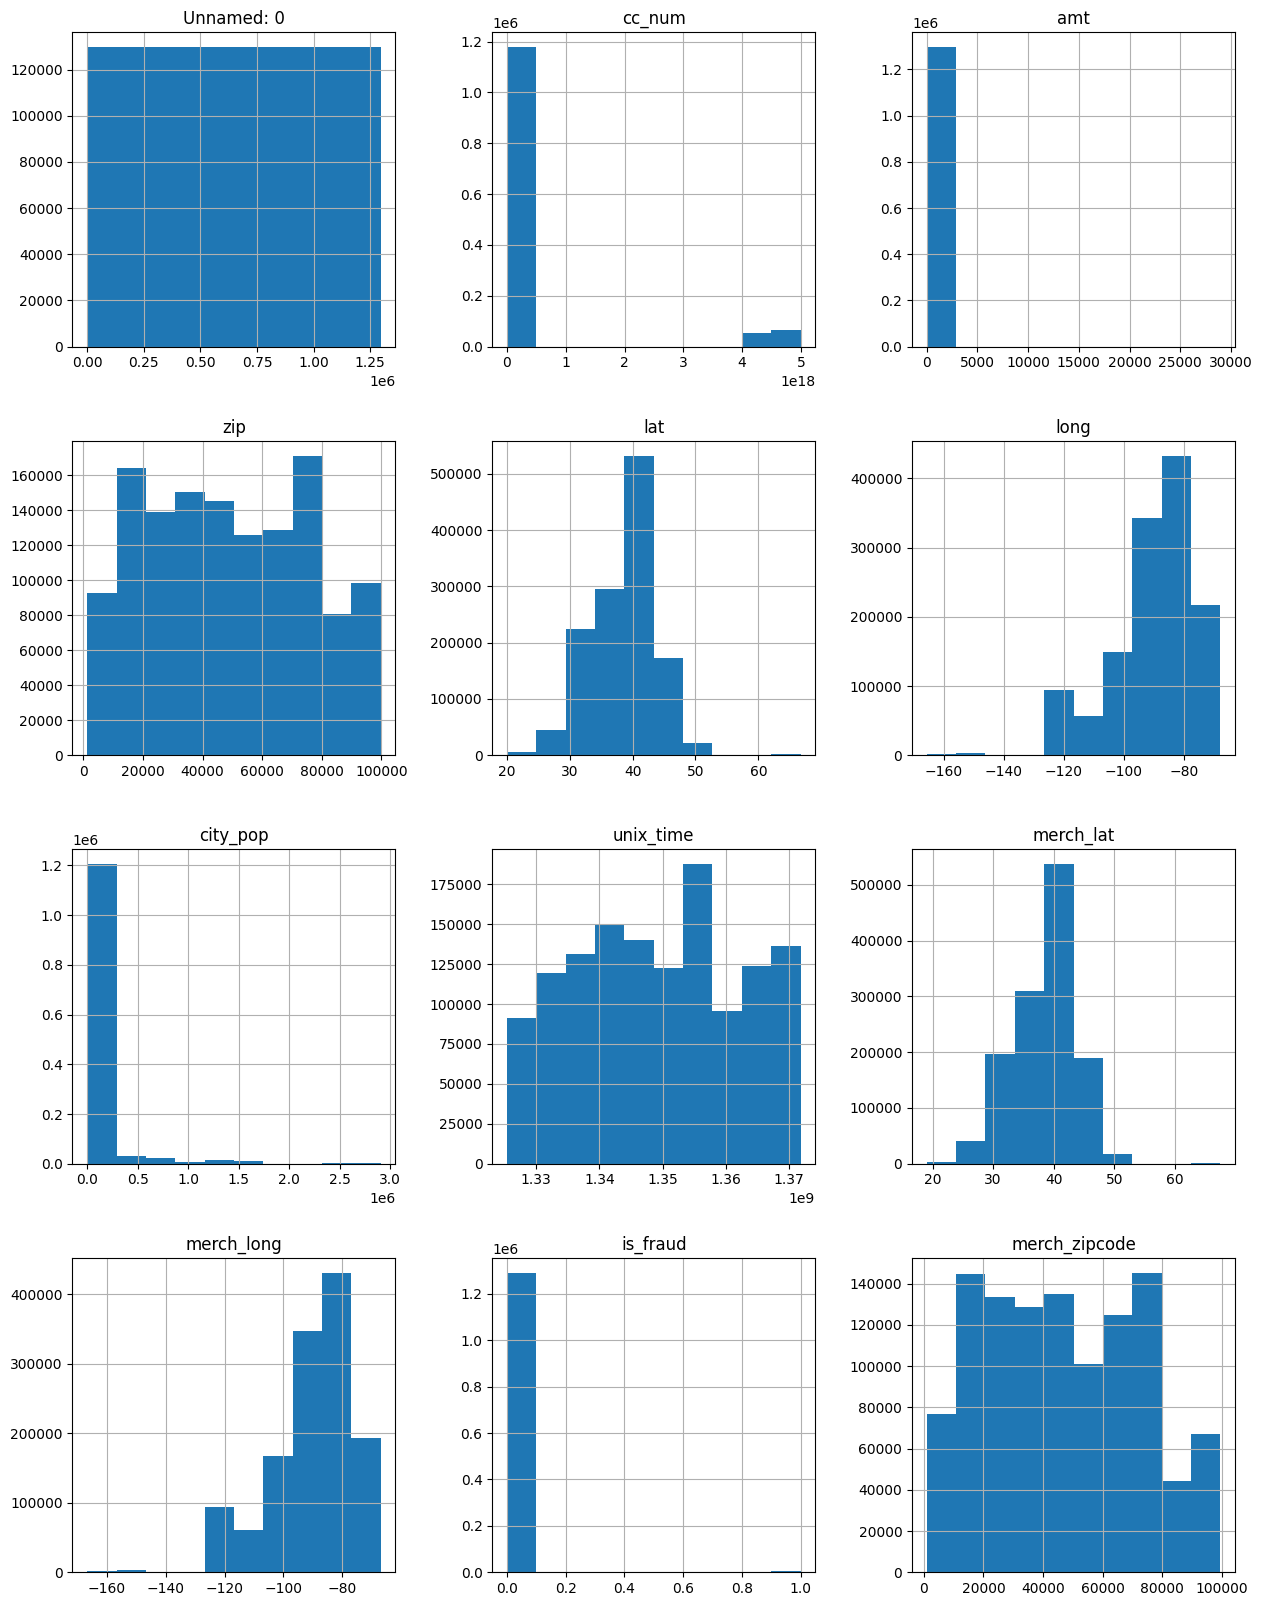

In [9]:
data.hist(figsize=(15, 20))
plt.show()

На основе полученных распрделений можно сделать следующие выводы:

* сумма транзаций amt варьируется от 0 до 2500;

* наиболее часто вречающиеся транзакции были осуществлены на широте (lat) от 38 до 42;

* наиболее часто встречающиеся транзакции были осуществлены на долготе (long) от -82 до -85;

* транзакции проводились чаще всего в городах с населением от 0 до 250 000;

* наиболее часто транзакции осуществлялись период времени по unix - time c 1,354-1,355 (1e^9). В дальнейшем переведем в даты и проанализируем данные периоды. Наименее часто транзацкии проводились в период времени с 1,358-1,362 (1e^9). B данный период оценим в дальнейшем анализе;

* чаще всего транзакции проводились в магазинах, расположенных на широте с 38 по 43. И незначительнное количество транзакций проводилось в магазинах, расположенных на широтах с 20 - 24 и с 48 по 53.

* аналогично в магазинах, расположенных на долготе с -81 до -85, чаще проводились транзакции;

* на диаграмме видно, что оченьнебольшое количество мошеннических транзакций незначительно. Данное соотношение проанализируем далее.

Поскольку датасет содержит информацию о суммах транзакций, то они должны иметь неотрицательные значения. Проверим датасет на наличие отрицательных некорректных значений.

In [10]:
numerical_columns = [b for b in data.columns if pd.api.types.is_numeric_dtype(data[b])]

negative_counts = (data[numerical_columns] < 0).sum()

print(negative_counts)

Unnamed: 0             0
cc_num                 0
amt                    0
zip                    0
lat                    0
long             1296675
city_pop               0
unix_time              0
merch_lat              0
merch_long       1296675
is_fraud               0
merch_zipcode          0
dtype: int64


Отрицательных значений в суммах транзакций нет.


Вывод по обзору данных:

* датасет содержит 23 698 позиций - объявлений о продаже квартир и 22 характеристики для каждой позиции
* столбцы имеют правильные названия для дальнейшей обработки данных, в частности, нет пробелов в названии, названия указаны в "змеином регистре"
* данные имют различные типы: bool(2), float64(14), int64(3), object(3)
* большинство позиций имеет пропуски в данных по характеристикам
столбцы не содержат отрицательных значений


В следующем разделе исследуем природу пропусков.

## Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))

In [ ]:
data.describe() # посмотрим на основные статистики данных

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04,2.019287e+03,6.142150e+00,1.558798e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04,4.522452e-01,3.417703e+00,8.829121e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03,2.019000e+03,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04,2.019000e+03,3.000000e+00,8.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04,2.019000e+03,6.000000e+00,1.500000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04,2.020000e+03,9.000000e+00,2.300000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04,2.020000e+03,1.200000e+01,3.100000e+01


In [ ]:
data.describe(include='object')

,merchant,category,gender,street,city,state,job,dob,name,trans_time
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,983,894,51,494,968,973,86400
top,fraud_Kilback LLC,gas_transport,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,Scott Martin,20:08:30
freq,4403,131659,709863,3123,5617,94876,9779,5636,4618,38


In [ ]:
data.describe(include='all')

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,dob,merch_lat,merch_long,is_fraud,merch_zipcode,name,trans_year,trans_month,trans_day,trans_time
count,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,1.296675e+06,1.296675e+06,...,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1296675
unique,NaN,693,14,NaN,2,983,894,51,NaN,NaN,...,968,NaN,NaN,NaN,NaN,973,NaN,NaN,NaN,86400
top,NaN,fraud_Kilback LLC,gas_transport,NaN,F,0069 Robin Brooks Apt. 695,Birmingham,TX,NaN,NaN,...,1977-03-23,NaN,NaN,NaN,NaN,Scott Martin,NaN,NaN,NaN,20:08:30
freq,NaN,4403,131659,NaN,709863,3123,5617,94876,NaN,NaN,...,5636,NaN,NaN,NaN,NaN,4618,NaN,NaN,NaN,38
mean,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,4.880067e+04,3.853762e+01,...,NaN,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04,NaN,2.019287e+03,6.142150e+00,1.558798e+01,NaN
std,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,2.689322e+04,5.075808e+00,...,NaN,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04,NaN,4.522452e-01,3.417703e+00,8.829121e+00,NaN
min,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.257000e+03,2.002710e+01,...,NaN,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03,NaN,2.019000e+03,1.000000e+00,1.000000e+00,NaN
25%,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,2.623700e+04,3.462050e+01,...,NaN,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04,NaN,2.019000e+03,3.000000e+00,8.000000e+00,NaN
50%,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,4.817400e+04,3.935430e+01,...,NaN,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04,NaN,2.019000e+03,6.000000e+00,1.500000e+01,NaN
75%,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,7.204200e+04,4.194040e+01,...,NaN,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04,NaN,2.020000e+03,9.000000e+00,2.300000e+01,NaN


## Есть ли пропущенные значения.
 Сколько. Какова их доля от общего числа объектов для каждого конкретного признака. И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений. Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно обработать пропуски

In [ ]:
data.isna().sum() # пропуски есть в одном столбце - merch_zipcode

,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [ ]:
data.isna()['merch_zipcode'].value_counts() # распределение заполненных/пропущенных данных в merch_zipcode

,count
merch_zipcode,
False,1100702
True,195973


In [ ]:
data[data['merch_zipcode'].isnull()]['is_fraud'].value_counts() # около 1/7 всех is_fraud == 1 с пропущенными значениями в столбце merch_zipcode

,count
is_fraud,
0,194830
1,1143


In [ ]:
(data.isna()['merch_zipcode'].value_counts()[True] * 100) / data.shape[0] # процентов пропущено в столбце merch_zipcode

15.113501841247807

Надо придумать как его грамотно заполнить, кажется это может быть важным

Идея - попробовать заполнить пропущенные значения с помощью метода k ближайших соседей!

In [ ]:
data.fillna(-1, inplace=True) # пока что заполняем пропущенные значения -1.

## Есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их

In [ ]:
# ошибочных данных нет

## Есть ли выбросы в данных? По возможности обработать их

In [ ]:
object_cols = data.select_dtypes([object]).columns # категориальные переменные
num_cols = data.select_dtypes([int, float]).columns # числовые переменные

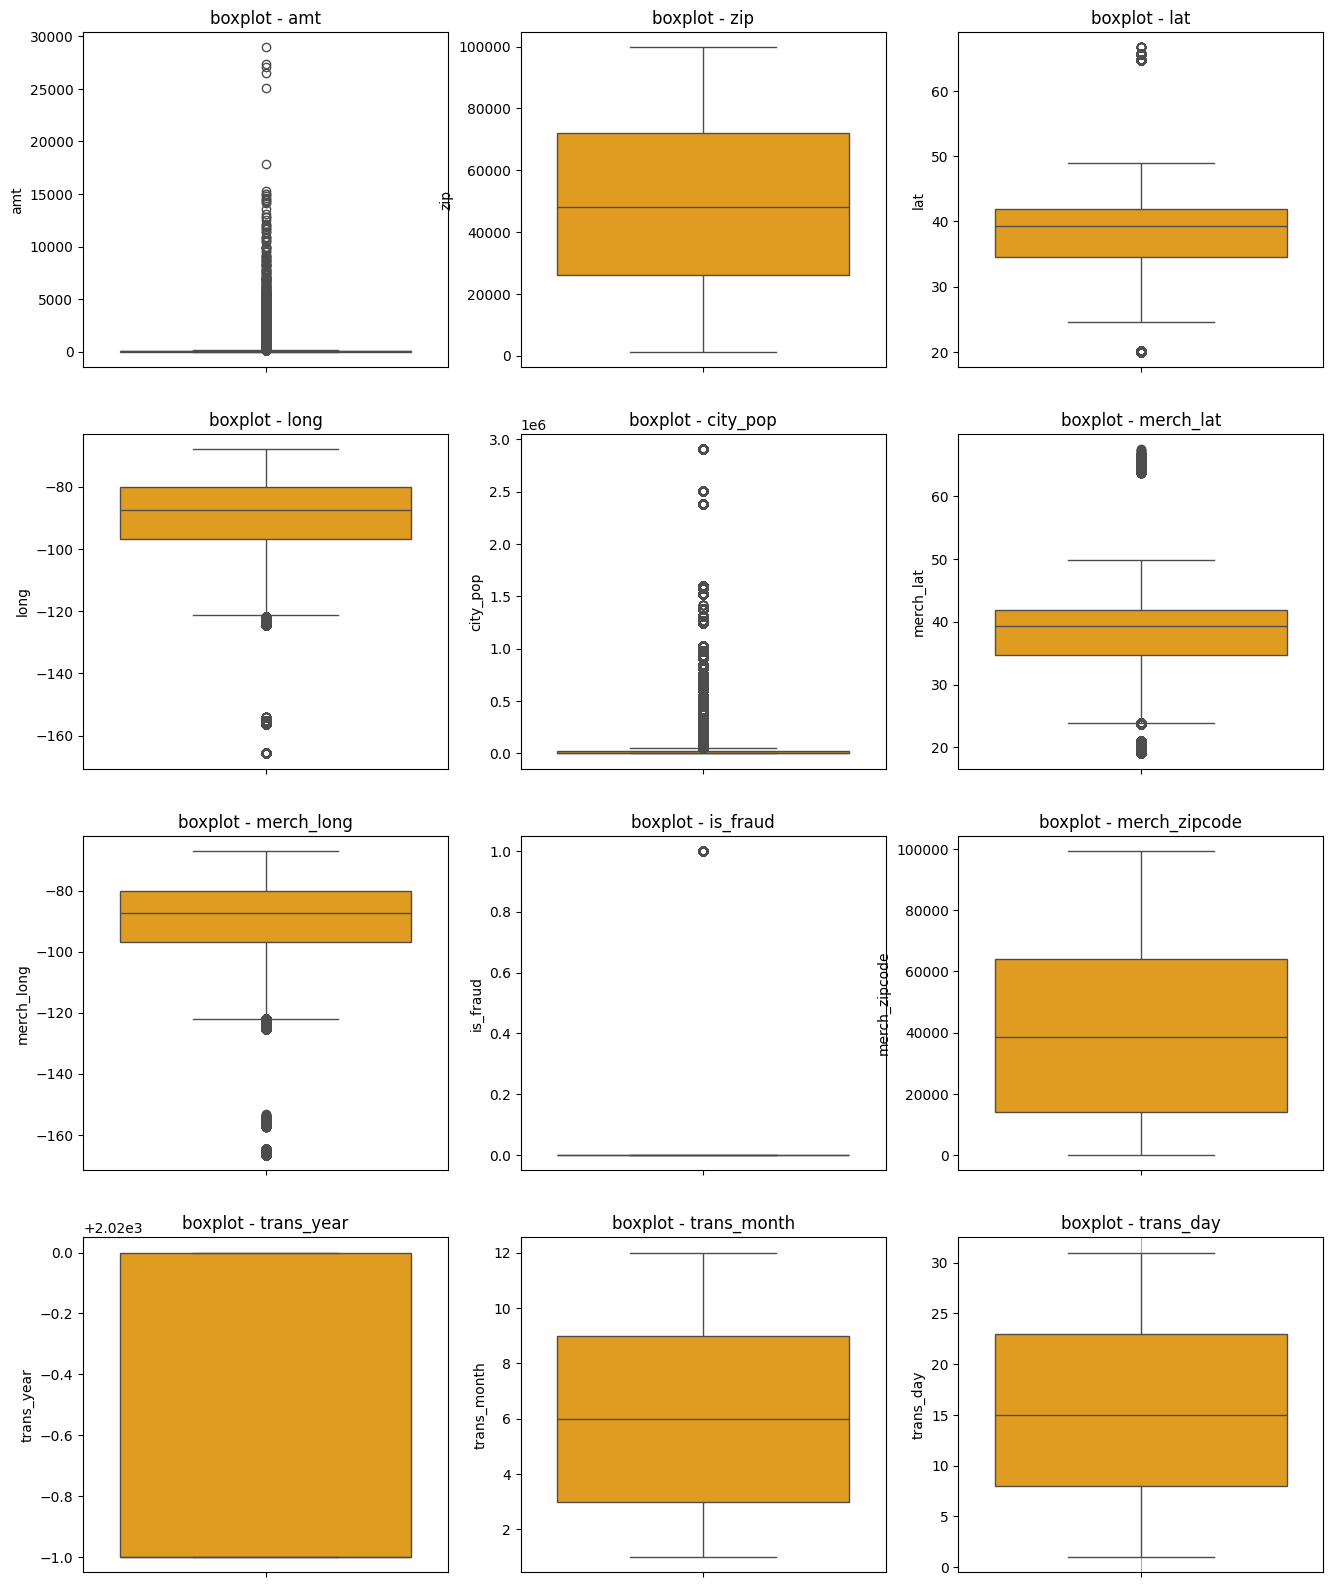

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16,20))
for num_col, ax in zip(num_cols[1:], axes.flatten()):
    sns.boxplot(data[num_col], ax=ax, color='orange')
    ax.set_title(f'boxplot - {num_col}')
    plt.grid()
plt.show()

В amt есть большие значения, но думаю их не стоит пока что трогать

## Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные распределения признаков (sns.pairplot()) и корреляции наиболее значимых

In [ ]:
data.corr(numeric_only=True)

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981,0.041321,0.000466,-0.000281,0.000545
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404,0.000650,0.000842,-0.001748,0.000629
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,-0.113561,-0.908924,-0.002162,0.605024,0.000086,0.000852,-0.000607
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894,-0.109120,0.001274,-0.001072,-0.000138
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721,-0.477844,0.000191,-0.001213,0.000031
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136,0.056029,-0.001673,0.000137,0.000159
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741,-0.106868,0.001244,-0.001116,-0.000276
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721,-0.478661,0.000184,-0.001197,0.000076
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000,-0.002392,0.003004,-0.012409,0.003848
merch_zipcode,0.041321,0.000650,0.605024,-0.109120,-0.477844,0.056029,-0.106868,-0.478661,-0.002392,1.000000,0.001055,0.000220,-0.000339


<Axes: >

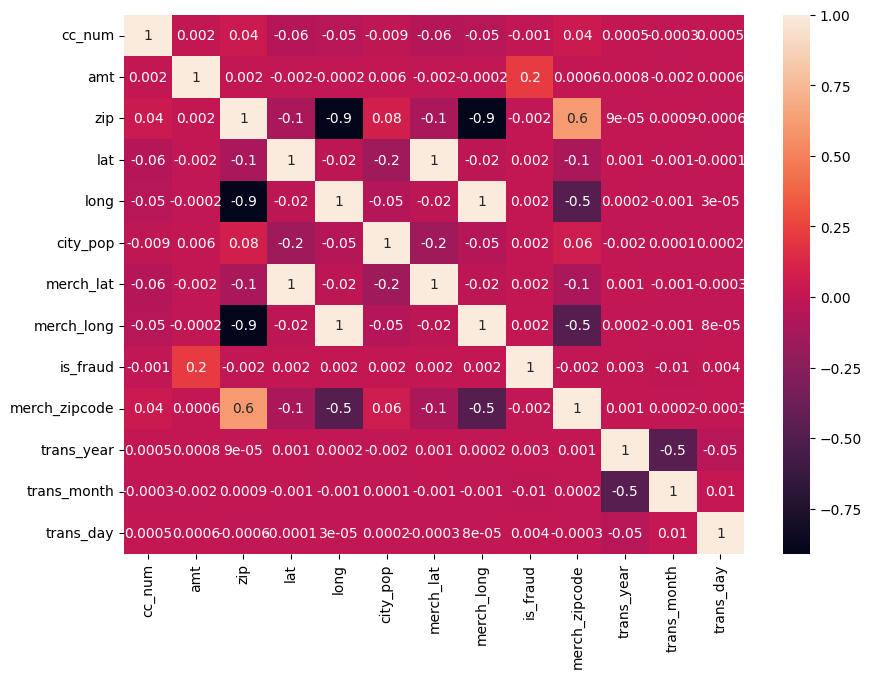

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.1g')

In [ ]:
# видна связь merch_long - zip, merch_long - merch_zipcode, merch_zipcode - long, lon - zip
# Иными словами коллериют между собой географические координаты
# С Целевой переменной явной связи не обнаружено (очень слабая c amt(суммой транзакции))

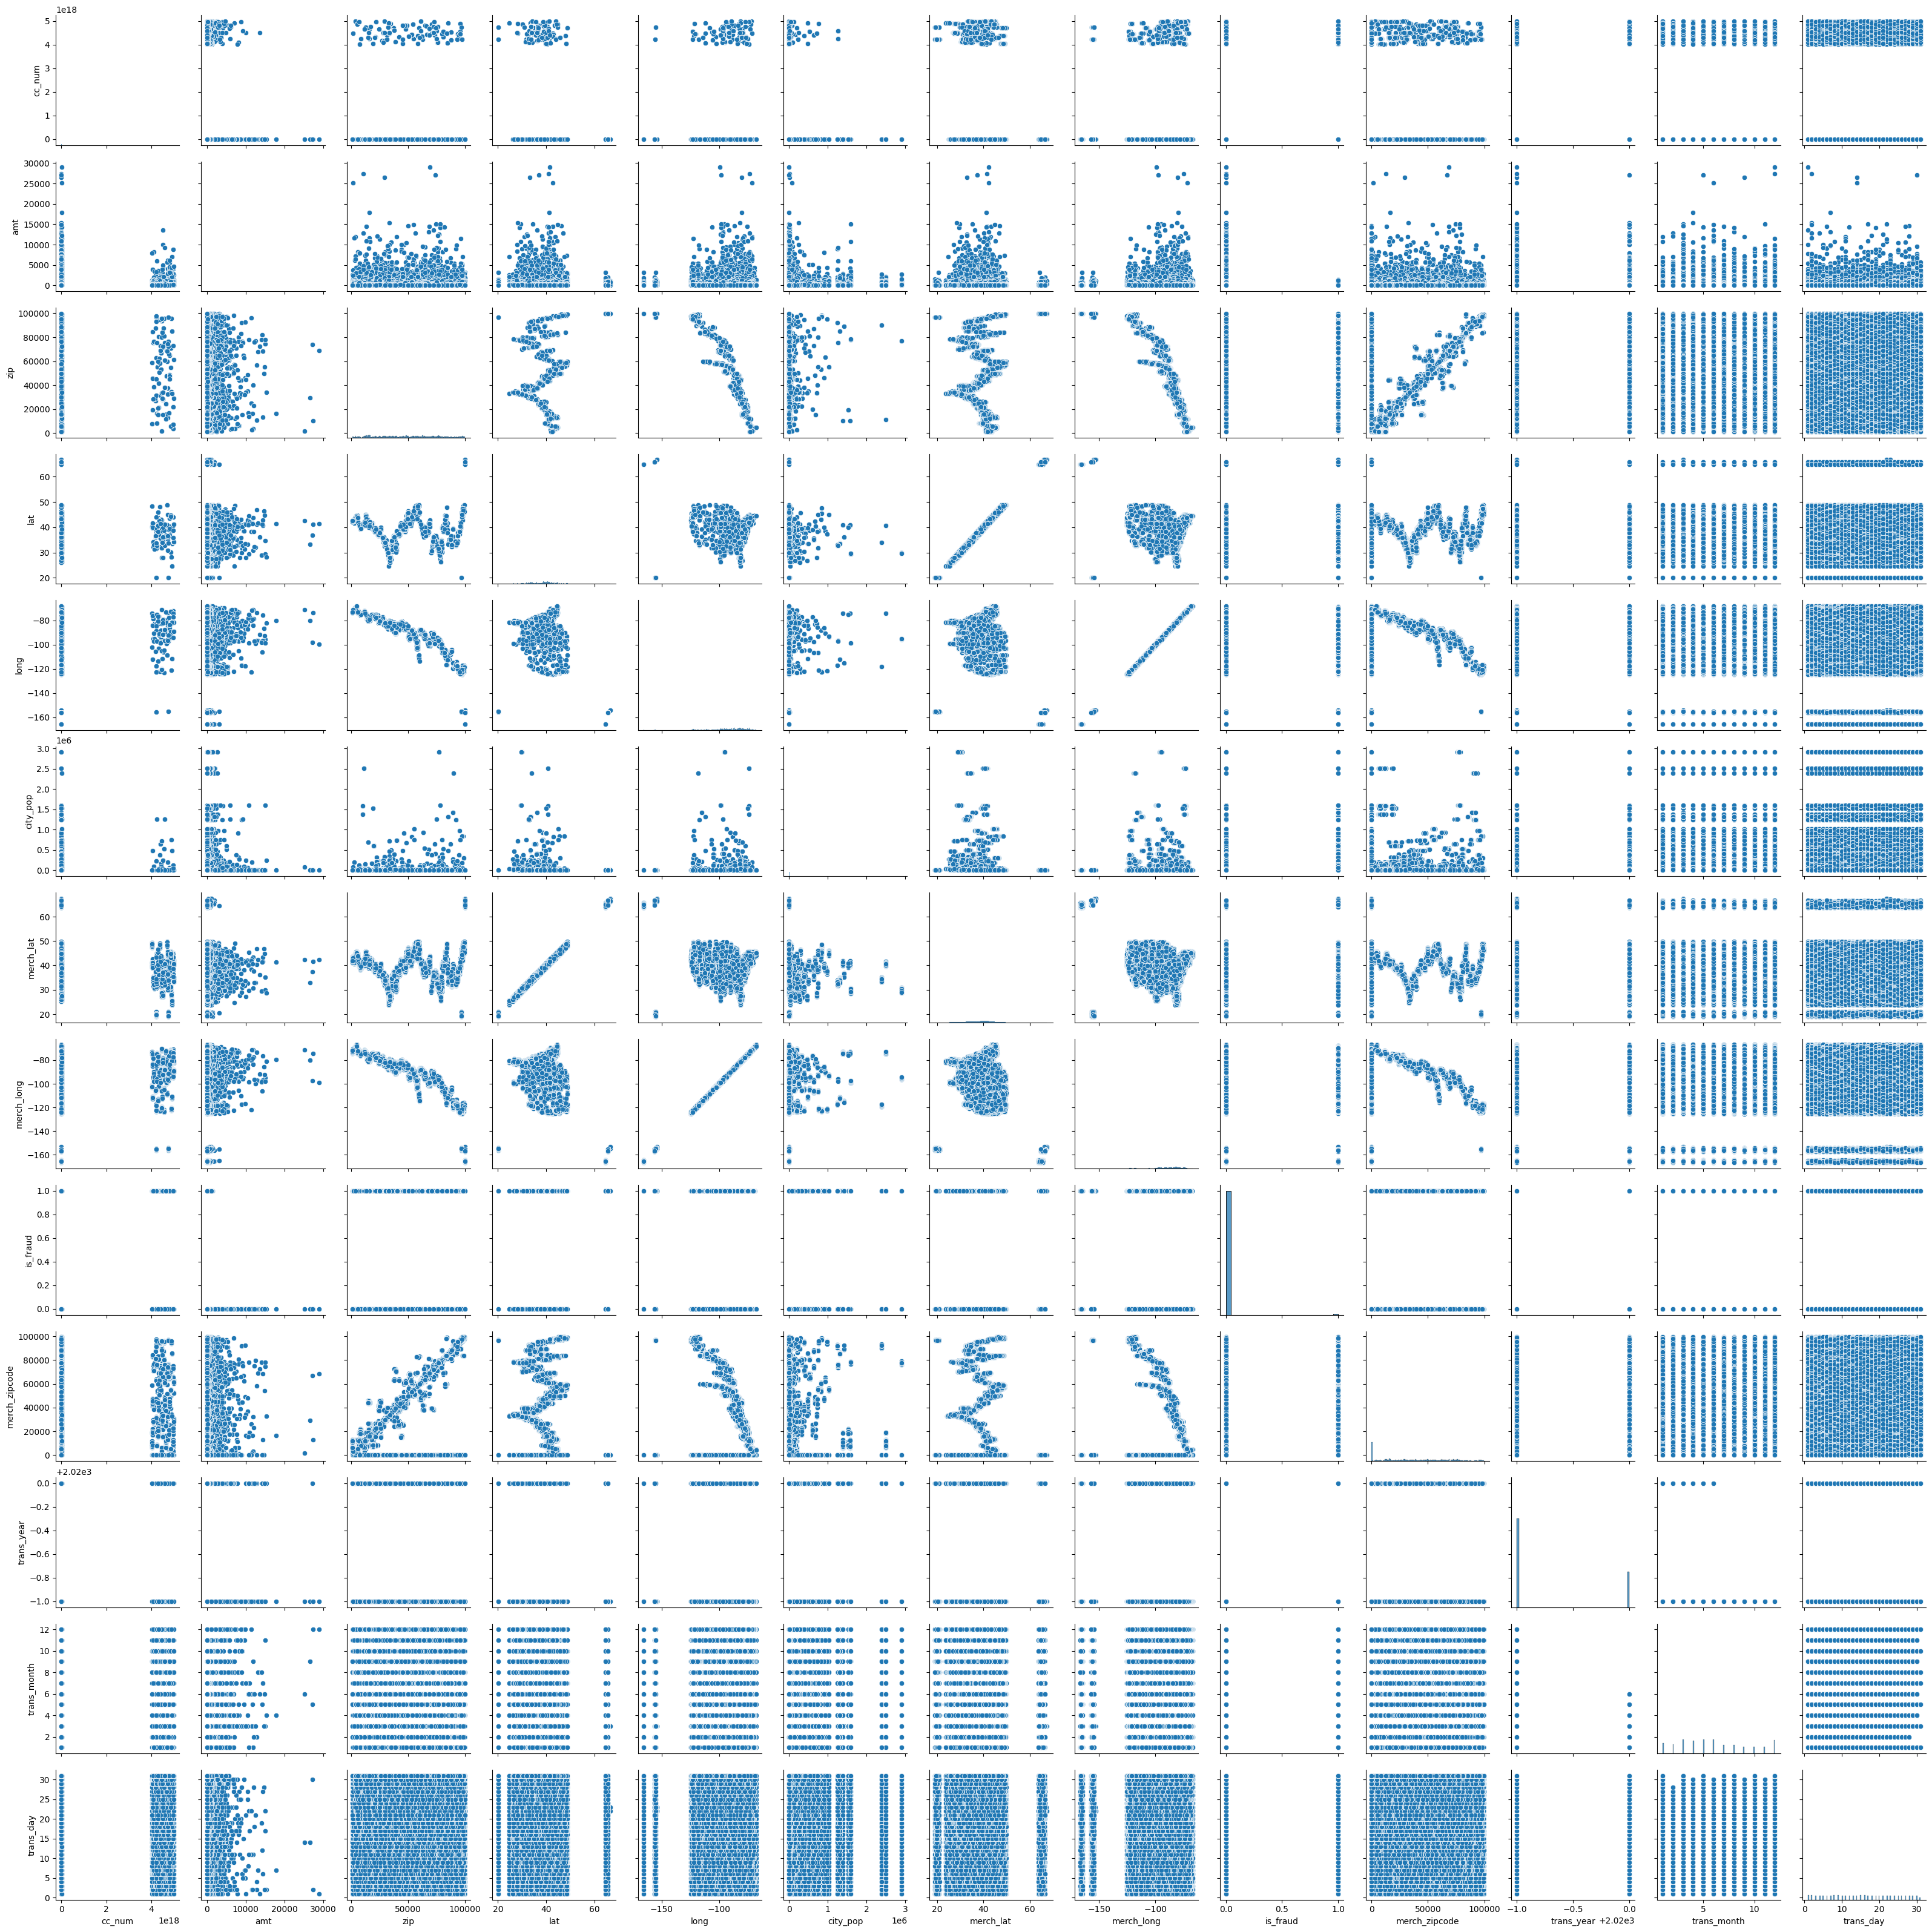

In [ ]:
sns.pairplot(data)

## Построить подходящие сводные таблицы и прочие диаграммы

In [ ]:
data['is_fraud'].value_counts() # распределение target

,count
is_fraud,
0,1289169
1,7506


In [ ]:
data.groupby(by=['category'])['amt'].sum().sort_values(ascending=False) # в каких категориях тратят больше денег

,amt
category,
grocery_pos,14460822.38
shopping_pos,9307993.61
shopping_net,8625149.68
gas_transport,8351732.29
home,7173928.11
kids_pets,6503680.16
entertainment,6036678.56
misc_net,5117709.26
misc_pos,5009582.50


In [ ]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].sum().sort_values(ascending=False) # в каких категориях больше теряют денег

,amt
category,
shopping_net,1711723.71
shopping_pos,739245.09
misc_net,729266.76
grocery_pos,543797.90
entertainment,117323.79
misc_pos,54571.02
home,50971.66
food_dining,18131.62
gas_transport,7594.11


In [ ]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].count().sort_values(ascending=False) # Всего операций по каждой категрии где is_fruad == 1

,amt
category,
grocery_pos,1743
shopping_net,1713
misc_net,915
shopping_pos,843
gas_transport,618
misc_pos,250
kids_pets,239
entertainment,233
personal_care,220


In [ ]:
data[data['is_fraud'] == 1].groupby(by=['gender'])['amt'].count() # общее количество мошеннеческих транзакций равномерно распределенно по полу

,amt
gender,
F,3735
M,3771


In [ ]:
data[data['is_fraud'] == 1].groupby(by=['state'])['amt'].count().sort_values(ascending=False).head(10) # колл-во мошен. тр. по штату
# наверное это связано с тем что NY и TX самые густо населённые и там соответственно больше всего транзакций

,amt
state,
NY,555
TX,479
PA,458
CA,326
OH,321
FL,281
IL,248
MI,238
AL,215


In [ ]:
(data[data['is_fraud'] == 1].groupby(by=['state'])['amt'].count()/data['amt'].count()).sort_values(ascending=False).head(10) # доля мош.тр. среди всех тр. по штатам

,amt
state,
NY,0.000428
TX,0.000369
PA,0.000353
CA,0.000251
OH,0.000248
FL,0.000217
IL,0.000191
MI,0.000184
AL,0.000166


In [ ]:
data[data['is_fraud'] == 1].groupby(by=['city'])['amt'].count().sort_values(ascending=False).head(10)# колл-во мошен. тр. по городу

,amt
city,
Houston,39
Warren,33
Naples,29
Huntsville,29
Topeka,27
Tulsa,27
Dallas,27
Detroit,26
Randolph,25


In [ ]:
data[data['is_fraud'] == 1]['amt'].mean() # сколько в среднем теряется денег за одну мош. тр.

531.3200919264589

In [ ]:
data[data['is_fraud'] == 1]['amt'].median() # медианное значение за одну мош.тр.

396.505

In [ ]:
from datetime import time # сделаем колонки: morning, midday, evening, night - часть дня когда была сделана транзакция
data['morning'] = np.where((time(6,0,0) <= data['trans_time']) & (data['trans_time'] <= time(12,0,0)), 1, 0)
data['midday'] = np.where((time(12,0,0) < data['trans_time']) & (data['trans_time'] <= time(18,0,0)), 1, 0)
data['evening'] = np.where((time(18,0,0) < data['trans_time']) & (data['trans_time'] <= time(23,59,59)), 1, 0)
data['night'] = np.where((time(0,0,0) <= data['trans_time']) & (data['trans_time'] < time(6,0,0)), 1, 0)

In [ ]:
data[data['is_fraud'] == 1][['morning', 'midday', 'evening', 'night']].value_counts() # большинство мош. тр. делается вечером с 18:00 до 00:00
# следом кол-во мош.тр. ночью - 00:00 до 06:00.

morning  midday  evening  night
0        0       1        0        4133
                 0        1        2633
         1       0        0         466
1        0       0        0         274
Name: count, dtype: int64

## Вывод

Проведённый анализ позволяет сделать следующие наблюдения:

* распределение целевой переменной - 1289169(нормальные) и 7506(мошеннеческие)
* большинство мошеннеческих транзакций делается вечером - между 18 и 24 часами
* распределение мошеннеческих транзакций по полу равномерное
* медианная сумма кражи денег за одну транзакцию - 396, среднее - 531
* больше всего мошеннеческих транзакций в категориях покупок - grocery_pos,  shopping_net
* по доле мошеннеческих транзакций среди общего кол-ва лидируют штаты: NY, TX, PA

## Попробуем взять почтовые индексы через geopy

In [ ]:
from datetime import datetime
ts = int('1325376186') # 1546300986
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2012-01-01 00:03:06


In [ ]:
# unix_time не сходится с trans_date_trans_time. Отличия на 7 лет

In [ ]:
!pip install geopy

In [ ]:
import asyncio
from geopy.geocoders import Nominatim
import time

async def getzipcode(geoloc, coords, n):
    postcodes = []
    for c in coords:
        try:
            location = geoloc.reverse(f"{c[0]}, {c[1]}", addressdetails=True)
            # time.sleep(1)
            if location:
                zip_code = location.raw.get('address').get('postcode')
                if zip_code:
                    postcodes.append((zip_code, c[0], c[1]))
                    print(f' - task{n} --  ', zip_code)
                else:
                    print(f' - task{n} --  ', 0)
            else:
                print(f' - task{n} --  location NAN')
        except: print('что-то на этом этапе пошло не так')
        finally: continue
    return postcodes

async def main(coords):
    tasks = [getzipcode(Nominatim(user_agent=f"my_app{i}"), coord, i) for i, coord in zip(range(10), np.array_split(coords, 10))]
    results =  await asyncio.gather(*tasks)
    return results

coords = data[data['merch_zipcode'].isnull()][['merch_lat', 'merch_long']].values

# postcodes = getzipcode(coords)
postcodes = await main(coords[:100])

In [ ]:
postcodes

[[], [], [], [], [], [], [], [], [], []]

In [ ]:
print('sfds')

In [8]:
print('sfds')

sfds
